# Projeto Final: Análise de Sentimentos usando avaliações coletadas de curso da plataforma "Coursera"

Disciplina: Processamento de Linguagem Natural

Professores: Luciano Barbosa / Johny Moreira 

Aluno: Laureano Montarroyos Fo

Especialização Deep Learning - Turma 2022/2023

Cin.AI - UFPE

.Fonte de Dados: coletou-se dados de avaliações feitas para o curso "Sequence Models", capacitação que faz parte da especialização em Deep Learning da plataforma on-line de cursos da "Coursera", cujo endereço é o "https://www.coursera.org/learn/nlp-sequence-models". Foram capturadas 6467 avaliações em 21/03/2023 por um programa elaborado em python, fazendo uso da biblioteca "Scrapy", a partir do endereço "https://www.coursera.org/learn/nlp-sequence-models/reviews?page=1".

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Apr 14 23:36:38 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    51W / 400W |  33773MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 89.6 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
!pip install -q numpy==1.24.0

In [ ]:
!pip install -q -U "tensorflow==2.8.*"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.1/498.1 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.3/462.3 kB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 99.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 65.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 79.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 104.0 MB/s eta 0:00:00


In [ ]:
!pip install -q tf-models-official==2.3.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.6/240.6 kB 27.3 MB/s eta 0:00:00


In [ ]:
# bibliotecas básicas
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pylab import rcParams

In [ ]:
# Configurando tamanho das imagens
rcParams['figure.figsize'] = 9, 3

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/Disciplinas/Processamento de Linguagem Natural/Projeto


!ls

/content/gdrive/MyDrive/Disciplinas/Processamento de Linguagem Natural/Projeto
 coursera.csv			    ExplorarBase.ipynb
 coursera-processado.csv	    In-Context-Learning.ipynb
 coursera-processado-para-SVM.csv   PLN-Bert.ipynb
 coursera.py			    PLN-SVM02.ipynb
'Documento sem título.gdoc'	    saved_model


# Pré-processamento do aquivo CSV com dados coletados da plataforma da "Coursera"

In [ ]:
df = pd.read_csv("coursera.csv")
df.shape

(6467, 3)

In [ ]:
df.head()

,indice,estrelas,comentario
0,1,Filled Star:Star:Star:Star:Star:,"Tons of editing errors in lectures, and the pr..."
1,2,Filled Star:Filled Star:Star:Star:Star:,This course is by far the weakest out of the 5...
2,3,Filled Star:Star:Star:Star:Star:,Full of appalling errors that have been presen...
3,4,Filled Star:Filled Star:Filled Star:Star:Star:,I really like the deeplearning.ai specializati...
4,5,Filled Star:Filled Star:Star:Star:Star:,The lectures were great. Andrew is a wonderful...


Função para criar coluna com contagem do número de estrelas atribuídas pelo usuário ao realizar comentário no site sobre o curso. A marcação "Filled Star" indica a atribuição de estrela, simbolizando a imagem preenchida com cor. Por outro lado, a marca "Star" simboliza estrela não preenchida e sem cor.


In [ ]:
def contaEstrelas(estrelas):
  pontos = 0
  if(estrelas!=''):
    lista = estrelas.split(':')
    for item in lista:
      if(item=='Filled Star'):
        pontos+=1
  return pontos

df['qtd_estrelas'] = df.estrelas.apply(contaEstrelas)
df.head()

,indice,estrelas,comentario,qtd_estrelas
0,1,Filled Star:Star:Star:Star:Star:,"Tons of editing errors in lectures, and the pr...",1
1,2,Filled Star:Filled Star:Star:Star:Star:,This course is by far the weakest out of the 5...,2
2,3,Filled Star:Star:Star:Star:Star:,Full of appalling errors that have been presen...,1
3,4,Filled Star:Filled Star:Filled Star:Star:Star:,I really like the deeplearning.ai specializati...,3
4,5,Filled Star:Filled Star:Star:Star:Star:,The lectures were great. Andrew is a wonderful...,2


Examinando a distribuição da quantidade de estrelas para averiguar a possibilidade de agregar as avaliações em apenas duas categorias, caso os conteúdos façam sentido, de maneira a não distorcer o significado que se pretende aferir pelo treinamento.

In [ ]:
(df.groupby('qtd_estrelas').count())

,indice,estrelas,comentario
qtd_estrelas,,,
1,45,45,45
2,81,81,81
3,396,396,396
4,1131,1131,1131
5,4814,4814,4814


In [ ]:
print(df[df['qtd_estrelas']==3][['comentario','indice']])

                                             comentario  indice
3     I really like the deeplearning.ai specializati...       4
11    5 stars for the very informative lectures.  I ...      12
75    The first week is amazing. The last week is th...      76
76    Week 4 coding exercise is incomparably harder ...      77
3148  in comparison to the previous courses from thi...    3149
...                                                 ...     ...
6462  Overall a great class. I had some trouble unde...    6463
6463  This felt the the least prepared and organized...    6464
6464  give projects that we can build from ground up...    6465
6465  Good theoretical overview - project just requi...    6466
6466  Lectures on week4 are not complete as confirme...    6467

[396 rows x 2 columns]


In [ ]:
df[df['indice']==4]['comentario'].tolist()

['I really like the deeplearning.ai specialization. And also I like the Sequence Models course. However, I feel that I have learned less during this course comparing to the other ones in the specialization. First, I believe it was an extensive use of Keras. Whereas the framework is great, it would be much better for understanding if all the exercises were in numpy, whereas Keras tween-projects be optional.  Doing both numpy and Keras versions would allow to better understand the material and learn through repetition. Second, even though the course is great, I perceived the number of errors/typos was much higher than in other courses. Is that true? For example, the Jazz Improvisation exercise was a nightmare. Overall, thank you for the course. Despite those problems, I would still recommend it.']

In [ ]:
df[df['indice']==6467]['comentario'].tolist()

['Lectures on week4 are not complete as confirmed by mentor in the community']

Função para criar coluna que junta as avaliações das revisões em dois grupos: "0" para uma avaliação ruim, agregando as revisões de 1 a 3 estrelas e "1" para uma avaliação boa, agregando as revisões com 4 e 5 estrelas.



In [ ]:
avaliacoes_rotulos = ['ruim','boa']

In [ ]:
def classifica_revisao_em_boa_ou_ruim(estrelas):
  avaliacao = 0
  if estrelas > 3:
    avaliacao = 1
  return avaliacao

df['avaliacao'] = df.qtd_estrelas.apply(classifica_revisao_em_boa_ou_ruim)

print('A base possui um total de {} registros. Os 10 primeiros são:'.format(len(df)))
df.head(10)

A base possui um total de 6467 registros. Os 10 primeiros são:


,indice,estrelas,comentario,qtd_estrelas,avaliacao
0,1,Filled Star:Star:Star:Star:Star:,"Tons of editing errors in lectures, and the pr...",1,0
1,2,Filled Star:Filled Star:Star:Star:Star:,This course is by far the weakest out of the 5...,2,0
2,3,Filled Star:Star:Star:Star:Star:,Full of appalling errors that have been presen...,1,0
3,4,Filled Star:Filled Star:Filled Star:Star:Star:,I really like the deeplearning.ai specializati...,3,0
4,5,Filled Star:Filled Star:Star:Star:Star:,The lectures were great. Andrew is a wonderful...,2,0
5,6,Filled Star:Star:Star:Star:Star:,Keras is required to pass the assignments but ...,1,0
6,7,Filled Star:Filled Star:Filled Star:Filled Sta...,"To set the context, I have a PhD in Computer E...",5,1
7,8,Filled Star:Filled Star:Filled Star:Filled Sta...,I am so grateful that Andrew and the team prov...,5,1
8,9,Filled Star:Filled Star:Filled Star:Filled Sta...,I want to thank Andrew Ng and his team for the...,5,1
9,10,Filled Star:Filled Star:Star:Star:Star:,I went through all course of DeepLearning.ai S...,2,0


In [ ]:
(df.groupby('avaliacao').count())

,indice,estrelas,comentario,qtd_estrelas
avaliacao,,,,
0,522,522,522,522
1,5945,5945,5945,5945


Função para criar coluna com tamanho do comentário a fim de ajudar na definição do tamanho máximo a ser considerado no treinamento do modelo.

In [ ]:
def Registra_tamanho_do_comentario(comentario):
  #l1 = comentario.tolist()
  return len(comentario)

df['tamanho_comentario'] = df.comentario.apply(Registra_tamanho_do_comentario)

print('A base possui um total de {} registros. Os 10 primeiros são:'.format(len(df)))
df.head(10)

A base possui um total de 6467 registros. Os 10 primeiros são:


,indice,estrelas,comentario,qtd_estrelas,avaliacao,tamanho_comentario
0,1,Filled Star:Star:Star:Star:Star:,"Tons of editing errors in lectures, and the pr...",1,0,249
1,2,Filled Star:Filled Star:Star:Star:Star:,This course is by far the weakest out of the 5...,2,0,645
2,3,Filled Star:Star:Star:Star:Star:,Full of appalling errors that have been presen...,1,0,419
3,4,Filled Star:Filled Star:Filled Star:Star:Star:,I really like the deeplearning.ai specializati...,3,0,802
4,5,Filled Star:Filled Star:Star:Star:Star:,The lectures were great. Andrew is a wonderful...,2,0,835
5,6,Filled Star:Star:Star:Star:Star:,Keras is required to pass the assignments but ...,1,0,160
6,7,Filled Star:Filled Star:Filled Star:Filled Sta...,"To set the context, I have a PhD in Computer E...",5,1,264
7,8,Filled Star:Filled Star:Filled Star:Filled Sta...,I am so grateful that Andrew and the team prov...,5,1,199
8,9,Filled Star:Filled Star:Filled Star:Filled Sta...,I want to thank Andrew Ng and his team for the...,5,1,155
9,10,Filled Star:Filled Star:Star:Star:Star:,I went through all course of DeepLearning.ai S...,2,0,365


In [ ]:
df[df['indice']==6467]

,indice,estrelas,comentario,qtd_estrelas,avaliacao,tamanho_comentario
6466,6467,Filled Star:Filled Star:Filled Star:Star:Star:,Lectures on week4 are not complete as confirme...,3,0,74


Analisando o tamanho dos comentários a fim de definir um tamanho máximo para ser usado no treinamento

In [ ]:
# Tamanho do maior comentário
df['tamanho_comentario'].max()

1904

In [ ]:
df['tamanho_comentario'].describe()

count    6467.000000
mean      110.552807
std       124.203054
min         1.000000
25%        31.000000
50%        73.000000
75%       146.000000
max      1904.000000
Name: tamanho_comentario, dtype: float64

In [ ]:
df[df['tamanho_comentario']>500]['tamanho_comentario'].count()

88

In [ ]:
df[df['tamanho_comentario']>1000]['tamanho_comentario'].count()

7

In [ ]:
max_sent_length = 500

In [ ]:
df.to_csv("coursera-processado.csv", index=False)

In [ ]:
!ls

aulas			  coursera-processado.csv		  PLN01.ipynb
coursera2.csv		  coursera-processado-segunda-parte.csv   PLN02.ipynb
coursera.csv		  coursera-processado-versao-inicial.csv
coursera-processado2.csv  coursera.py


In [ ]:
df = pd.read_csv("coursera-processado.csv")
df.shape

(6467, 6)

In [ ]:
print('A base possui um total de {} registros. Os 10 primeiros são:'.format(len(df)))

df.head(10)

A base possui um total de 6467 registros. Os 10 primeiros são:


,indice,estrelas,comentario,qtd_estrelas,avaliacao,tamanho_comentario
0,1,Filled Star:Star:Star:Star:Star:,"Tons of editing errors in lectures, and the pr...",1,0,249
1,2,Filled Star:Filled Star:Star:Star:Star:,This course is by far the weakest out of the 5...,2,0,645
2,3,Filled Star:Star:Star:Star:Star:,Full of appalling errors that have been presen...,1,0,419
3,4,Filled Star:Filled Star:Filled Star:Star:Star:,I really like the deeplearning.ai specializati...,3,0,802
4,5,Filled Star:Filled Star:Star:Star:Star:,The lectures were great. Andrew is a wonderful...,2,0,835
5,6,Filled Star:Star:Star:Star:Star:,Keras is required to pass the assignments but ...,1,0,160
6,7,Filled Star:Filled Star:Filled Star:Filled Sta...,"To set the context, I have a PhD in Computer E...",5,1,264
7,8,Filled Star:Filled Star:Filled Star:Filled Sta...,I am so grateful that Andrew and the team prov...,5,1,199
8,9,Filled Star:Filled Star:Filled Star:Filled Sta...,I want to thank Andrew Ng and his team for the...,5,1,155
9,10,Filled Star:Filled Star:Star:Star:Star:,I went through all course of DeepLearning.ai S...,2,0,365


In [ ]:
df.tail(10)

,indice,estrelas,comentario,qtd_estrelas,avaliacao,tamanho_comentario
6457,6458,Filled Star:Filled Star:Filled Star:Star:Star:,Really Nice course. Could have been more fun i...,3,0,90
6458,6459,Filled Star:Filled Star:Filled Star:Star:Star:,Course is got but grader compilations are horr...,3,0,90
6459,6460,Filled Star:Filled Star:Filled Star:Star:Star:,Not as good as structured in explanation nor i...,3,0,88
6460,6461,Filled Star:Filled Star:Filled Star:Star:Star:,"This is only good enough, not good course. All...",3,0,86
6461,6462,Filled Star:Filled Star:Filled Star:Star:Star:,the lab and programming is not as intuitive as...,3,0,85
6462,6463,Filled Star:Filled Star:Filled Star:Star:Star:,Overall a great class. I had some trouble unde...,3,0,84
6463,6464,Filled Star:Filled Star:Filled Star:Star:Star:,This felt the the least prepared and organized...,3,0,84
6464,6465,Filled Star:Filled Star:Filled Star:Star:Star:,give projects that we can build from ground up...,3,0,77
6465,6466,Filled Star:Filled Star:Filled Star:Star:Star:,Good theoretical overview - project just requi...,3,0,77
6466,6467,Filled Star:Filled Star:Filled Star:Star:Star:,Lectures on week4 are not complete as confirme...,3,0,74


# Pré-Processamento para divisão dos Dados e montagem de Dicionário

In [ ]:
# Recuperando a base salva após pré-processamento inicial
df = pd.read_csv("coursera-processado.csv")
df.shape

(6467, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6467 entries, 0 to 6466
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   indice              6467 non-null   int64 
 1   estrelas            6467 non-null   object
 2   comentario          6467 non-null   object
 3   qtd_estrelas        6467 non-null   int64 
 4   avaliacao           6467 non-null   int64 
 5   tamanho_comentario  6467 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 303.3+ KB


In [ ]:
data = df[['comentario', 'avaliacao']]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6467 entries, 0 to 6466
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   comentario  6467 non-null   object
 1   avaliacao   6467 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 101.2+ KB


In [ ]:
# Separação dos dados em conjuntos de treinamento e teste
from sklearn.model_selection import train_test_split
SEED = 42

data_train, data_test = train_test_split(data, shuffle=True, random_state=SEED, test_size=0.25)

print(data_train.shape)
print(data_test.shape)

(4850, 2)
(1617, 2)


In [ ]:
# Separação dos dados de treinamento em conjuntos de treinamento e validação
from sklearn.model_selection import train_test_split
SEED = 42

data_train, data_val = train_test_split(data_train, shuffle=True, random_state=SEED, test_size=0.25)

print(data_train.shape)
print(data_val.shape)


(3637, 2)
(1213, 2)


In [ ]:
data_train = data_train.to_numpy()
data_val = data_val.to_numpy()
data_test = data_test.to_numpy()

In [ ]:
data_train.shape

(3637, 2)

In [ ]:
data_test[1]

array(['Course content and lectures are excellent. Programming assignments have some minor glitches which should be addressed for a course that requires tuition. ',
       1], dtype=object)

In [ ]:
data_train[0:2]

array([['  Super, extremelly good !!!  ', 1],
       ['Awesome', 1]], dtype=object)

In [ ]:
def convert_to_dict_format(d):
  reviews = []
  labels = []
  
  for r, l in d:
    aux_r = bytes(r, 'utf-8')
    reviews.append(aux_r)
    labels.append(l)
  
  return {'reviews': reviews, 'labels':labels}

In [ ]:
convert_to_dict_format( data_train[0:2])

{'reviews': [b'  Super, extremelly good !!!  ', b'Awesome'], 'labels': [1, 1]}

In [ ]:
data_train = convert_to_dict_format(data_train)
data_val = convert_to_dict_format(data_val)
#data_test = convert_to_dict_format(data_test[0:249])
#data_test = convert_to_dict_format(data_test[0:499])
#data_test = convert_to_dict_format(data_test[0:749])
#data_test = convert_to_dict_format(data_test[0:999])
data_test = convert_to_dict_format(data_test)

In [ ]:
#data_train = convert_to_dict_format(data_train[0:499])
#data_val = convert_to_dict_format(data_val[0:249])
#data_test = convert_to_dict_format(data_test[0:249])

# Fazendo uso do BERT para processar os dados

In [ ]:
import os

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
#import tensorflow_models as tfm
import tensorflow_hub as hub
#import tensorflow_datasets as tfds
#tfds.disable_progress_bar()

from official.modeling import tf_utils
from official import nlp
from official.nlp import bert

# Load the required submodules
import official.nlp.optimization
import official.nlp.bert.bert_models
import official.nlp.bert.configs
import official.nlp.bert.run_classifier
import official.nlp.bert.tokenization
import official.nlp.data.classifier_data_lib
import official.nlp.modeling.losses
import official.nlp.modeling.models
import official.nlp.modeling.networks

/usr/local/lib/python3.9/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/usr/local/lib/python3.9/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.10.0 and strictly below 2.13.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.8.4 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're usin

In [ ]:
print(tf.__version__)

2.8.4


In [ ]:
gs_folder_bert = "gs://cloud-tpu-checkpoints/bert/keras_bert/uncased_L-12_H-768_A-12"
tf.io.gfile.listdir(gs_folder_bert)

['bert_config.json',
 'bert_model.ckpt.data-00000-of-00001',
 'bert_model.ckpt.index',
 'vocab.txt']

In [ ]:
hub_url_bert = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2"

In [ ]:
# Set up tokenizer to generate Tensorflow dataset
tokenizer = bert.tokenization.FullTokenizer(
    vocab_file=os.path.join(gs_folder_bert, "vocab.txt"),
     do_lower_case=True)

print("Vocab size:", len(tokenizer.vocab))

Vocab size: 30522


In [ ]:
tokenizer.convert_tokens_to_ids(['[CLS]', '[SEP]'])

[101, 102]

## Preparar Dados para processamento pelo Bert

In [ ]:
# valor definido pela avaliação feita na seção deste notebook intitulada:
# Pré-processamento do aquivo CSV com dados coletados da plataforma da "Coursera"
max_sent_length = 500

In [ ]:
# Rótulos definidos a partir do agrupamento das avaliações realizado na seção deste notebook intitulada:
# Pré-processamento do aquivo CSV com dados coletados da plataforma da "Coursera"
avaliacoes_rotulos = ['ruim','boa']

In [ ]:
def encode_sentence(s, tokenizer):
   tokens = list(tokenizer.tokenize(s))
   tokens.append('[SEP]')
   return tokenizer.convert_tokens_to_ids(tokens)

print(encode_sentence(data_train['reviews'][0][:max_sent_length], tokenizer))

[3565, 1010, 6034, 9215, 2204, 999, 999, 999, 102]


In [ ]:
def bert_encode(imdb, tokenizer):
  num_examples = len(imdb['reviews'])
  
  review = tf.ragged.constant([
      encode_sentence(s[:max_sent_length], tokenizer)
      for s in imdb["reviews"]])

  cls = [tokenizer.convert_tokens_to_ids(['[CLS]'])] * review.shape[0]
  input_word_ids = tf.concat([cls, review], axis=-1)

  input_mask = tf.ones_like(input_word_ids).to_tensor()

  type_cls = tf.zeros_like(cls)
  type_s1 = tf.ones_like(review)
  
  input_type_ids = tf.concat(
      [type_cls, type_s1], axis=-1).to_tensor()

  inputs = {
      'input_word_ids': input_word_ids.to_tensor(),
      'input_mask': input_mask,
      'input_type_ids': input_type_ids}

  return inputs

In [ ]:
data_train_enc = bert_encode(data_train, tokenizer)
data_train_labels = np.array(data_train['labels'])

data_validation_enc = bert_encode(data_val, tokenizer)
data_validation_labels = np.array(data_val['labels'])

data_test_enc = bert_encode(data_test, tokenizer)
data_test_labels  = np.array(data_test['labels'])

In [ ]:
data_train_enc['input_word_ids'][0]

<tf.Tensor: shape=(150,), dtype=int32, numpy=
array([ 101, 3565, 1010, 6034, 9215, 2204,  999,  999,  999,  102,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
     

In [ ]:
for key, value in data_train_enc.items():
  print(f'{key:15s} shape: {value.shape}')

print(f'data_train_labels shape: {data_train_labels.shape}')

input_word_ids  shape: (3637, 150)
input_mask      shape: (3637, 150)
input_type_ids  shape: (3637, 150)
data_train_labels shape: (3637,)


In [ ]:
for key, value in data_test_enc.items():
  print(f'{key:15s} shape: {value.shape}')

print(f'data_test_labels shape: {data_test_labels.shape}')

input_word_ids  shape: (1617, 150)
input_mask      shape: (1617, 150)
input_type_ids  shape: (1617, 150)
data_test_labels shape: (1617,)


## Ajuste de configuração do Modelo, fine-tunning e Avaliação


In [ ]:
import json

bert_config_file = os.path.join(gs_folder_bert, "bert_config.json")
config_dict = json.loads(tf.io.gfile.GFile(bert_config_file).read())

bert_config = bert.configs.BertConfig.from_dict(config_dict)

config_dict

{'attention_probs_dropout_prob': 0.1,
 'hidden_act': 'gelu',
 'hidden_dropout_prob': 0.1,
 'hidden_size': 768,
 'initializer_range': 0.02,
 'intermediate_size': 3072,
 'max_position_embeddings': 512,
 'num_attention_heads': 12,
 'num_hidden_layers': 12,
 'type_vocab_size': 2,
 'vocab_size': 30522}

In [ ]:
bert_classifier, bert_encoder = bert.bert_models.classifier_model(bert_config, num_labels=2)

In [ ]:
# When built the encoder is randomly initialized. Restore the encoder's weights from the checkpoint:
checkpoint = tf.train.Checkpoint(model=bert_encoder)
checkpoint.restore(
    os.path.join(gs_folder_bert, 'bert_model.ckpt')).assert_consumed()

BERT adopts the Adam optimizer with weight decay (aka "AdamW"). It also employs a learning rate schedule that firstly warms up from 0 and then decays to 0.

In [ ]:
# Set up epochs and steps
epochs = 10
batch_size = 32
eval_batch_size = 32

train_data_size = len(data_train_labels)
steps_per_epoch = int(train_data_size / batch_size)
num_train_steps = steps_per_epoch * epochs
warmup_steps = int(epochs * train_data_size * 0.1 / batch_size)

# creates an optimizer with learning rate schedule
optimizer = nlp.optimization.create_optimizer(
    2e-5, num_train_steps=num_train_steps, num_warmup_steps=warmup_steps)

In [ ]:
type(optimizer)

official.nlp.optimization.AdamWeightDecay

Treinamento do Modelo

In [ ]:
metrics = [tf.keras.metrics.SparseCategoricalAccuracy('accuracy', dtype=tf.float32)]
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

bert_classifier.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=metrics)

bert_classifier.fit(
      data_train_enc, data_train_labels,
      validation_data=(data_validation_enc, data_validation_labels),
      batch_size=batch_size,
      epochs=epochs)

Epoch 1/10
114/114 [==============================] - 33s 140ms/step - loss: 0.3536 - accuracy: 0.8812 - val_loss: 0.1849 - val_accuracy: 0.9209
Epoch 2/10
114/114 [==============================] - 15s 129ms/step - loss: 0.1229 - accuracy: 0.9500 - val_loss: 0.1538 - val_accuracy: 0.9357
Epoch 3/10
114/114 [==============================] - 15s 129ms/step - loss: 0.0639 - accuracy: 0.9813 - val_loss: 0.1559 - val_accuracy: 0.9530
Epoch 4/10
114/114 [==============================] - 15s 129ms/step - loss: 0.0338 - accuracy: 0.9926 - val_loss: 0.1613 - val_accuracy: 0.9588
Epoch 5/10
114/114 [==============================] - 15s 129ms/step - loss: 0.0214 - accuracy: 0.9956 - val_loss: 0.1835 - val_accuracy: 0.9621
Epoch 6/10
114/114 [==============================] - 15s 130ms/step - loss: 0.0132 - accuracy: 0.9970 - val_loss: 0.1946 - val_accuracy: 0.9563
Epoch 7/10
114/114 [==============================] - 15s 129ms/step - loss: 0.0076 - accuracy: 0.9986 - val_loss: 0.2216 - val_ac

In [ ]:
result = bert_classifier(data_test_enc, training=False)

In [ ]:
result = tf.argmax(result, axis=1).numpy()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(data_test_labels, result, target_names= avaliacoes_rotulos))

              precision    recall  f1-score   support

        ruim       0.87      0.77      0.82       141
         boa       0.98      0.99      0.98      1476

    accuracy                           0.97      1617
   macro avg       0.93      0.88      0.90      1617
weighted avg       0.97      0.97      0.97      1617



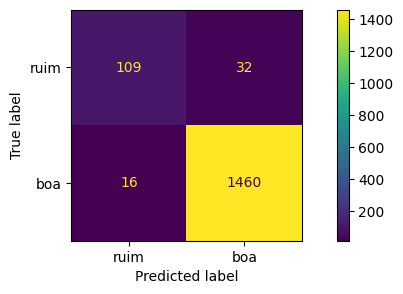

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(data_test_labels, result)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= avaliacoes_rotulos)
disp.plot()
plt.show()

In [ ]:
result

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
data_test_labels

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [ ]:
np.array(avaliacoes_rotulos)[result]

array(['boa', 'boa', 'boa', ..., 'boa', 'boa', 'boa'], dtype='<U4')

### Save the model

Often the goal of training a model is to _use_ it for something, so export the model and then restore it to be sure that it works.

In [ ]:
export_dir='./saved_model'

In [ ]:
tf.saved_model.save(bert_classifier, export_dir=export_dir)

In [ ]:
reloaded = tf.saved_model.load(export_dir)
reloaded_result = reloaded([data_test_enc['input_word_ids'],
                            data_test_enc['input_mask'],
                            data_test_enc['input_type_ids']], training=False)

original_result = bert_classifier(data_test_enc, training=False)

In [ ]:
# The results are (nearly) identical:
print("resultado original")
print(original_result.numpy())

resultado original
[[-3.8312125  3.9968643]
 [-2.4033074  2.853248 ]
 [-3.0894237  3.3357434]
 ...
 [-3.5729914  3.7641556]
 [-3.790491   3.9709983]
 [-3.779108   4.099271 ]]


In [ ]:
print("resultado carregado")
print(reloaded_result.numpy())

resultado carregado
[[-3.831201   3.9970274]
 [-2.4041364  2.854141 ]
 [-3.0893333  3.3355033]
 ...
 [-3.5728943  3.764056 ]
 [-3.790633   3.9710224]
 [-3.7790542  4.099148 ]]
